In [3]:
pip install imblearn

     |████████████████████████████████| 167 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 22.8 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np

# Over sampling techniques
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Undersampling techniques
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Under- and Oversampling can be combined
from imblearn.combine import SMOTETomek, SMOTEENN


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)

In [7]:
# Class sizes of Class 1 and class 2
n_1 = 100 # size of class 1
n_0 = 20 # size of class 2

In [8]:
# Create the y values
y = [1] * n_1 + [0] * n_0

In [12]:
# np.random.uniform() gives us a random number betweent 0 and 1
np.random.uniform(size=n_1)

array([0.08545506, 0.23055115, 0.39665629, 0.81924457, 0.94869932,
       0.52006507, 0.74307993, 0.13530506, 0.56898794, 0.93642078,
       0.42829814, 0.27495047, 0.1744516 , 0.20123386, 0.64620109,
       0.46137408, 0.50048532, 0.1643278 , 0.66968173, 0.01656851,
       0.01997039, 0.56642872, 0.16627195, 0.66306405, 0.26183104,
       0.91312208, 0.70075639, 0.24003347, 0.78059701, 0.38743724,
       0.3970197 , 0.72977821, 0.00169957, 0.36997495, 0.4481867 ,
       0.46756133, 0.66181308, 0.45475496, 0.37730935, 0.20108354,
       0.67267284, 0.15406986, 0.03229454, 0.27273829, 0.97968901,
       0.15655397, 0.11290984, 0.41875297, 0.35477554, 0.59199548,
       0.3894714 , 0.54324067, 0.2537572 , 0.2306345 , 0.40257612,
       0.04116696, 0.6194595 , 0.23914365, 0.22973776, 0.01944294,
       0.76091274, 0.7999916 , 0.09775452, 0.12805366, 0.65188666,
       0.71278349, 0.6626103 , 0.76985544, 0.28596516, 0.10681665,
       0.17914534, 0.79845962, 0.20040381, 0.72087905, 0.57148

In [13]:
# Create X values (x1 and x2)
# x = values for the class 1 + values for the class 0
x1 = list(np.random.uniform(size=n_1)*10) + list(np.random.uniform(low=.7, size=n_0)*10)
x2 = list(np.random.uniform(size=n_1)*10) + list(np.random.uniform(low=.7, size=n_0)*10)

In [14]:
# Create a DataFrame out of the data
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df.head()

,x1,x2,y
0,9.245641,1.158401,1
1,8.956881,9.573245,1
2,4.709948,4.020754,1
3,7.024426,0.095804,1
4,2.039196,2.403774,1


In [15]:
# Create a function that takes over plotting for us
def plot_data(df, a=1):
    '''
    The function plot_data plots the plot.
    '''
    sns.scatterplot(x='x1', y='x2', data=df, hue='y',  alpha=a)
    plt.title('Plot datapoints in 2 dimensions', fontsize=15)
    plt.xlabel('x1-values', fontsize=12)
    plt.ylabel('x2-values', fontsize=12)
    plt.axis(xmin=-1, xmax=11, ymin=-1, ymax=11)
    plt.show()

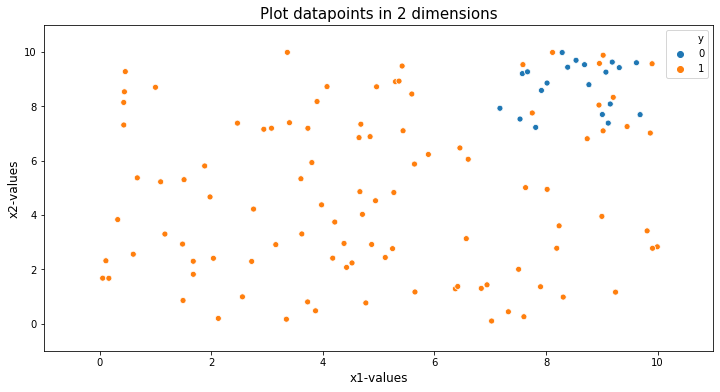

In [16]:
plot_data(df)

## Random oversampling

In [17]:
#!pip install imblearn

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
X = df[['x1', 'x2']]
X.head()

,x1,x2
0,9.245641,1.158401
1,8.956881,9.573245
2,4.709948,4.020754
3,7.024426,0.095804
4,2.039196,2.403774


In [20]:
# Create an Oversampler and fit_resample X and y
ros = RandomOverSampler(sampling_strategy={0: 50}) # sampling_strategy = {class: number_of_datapoints_after_resampling}

In [21]:
X_resample, y_resample = ros.fit_resample(X, y)

In [22]:
# Inspect the shape of the resampled data
X.shape, X_resample.shape

((120, 2), (150, 2))

In [23]:
# Create a resampled Dataset
def create_resampled_dataset(X_resample, y_resample):
    '''Creates a resampled DataFrame from X_resample and y_resample'''
    X_resample = pd.DataFrame(X_resample, columns=['x1', 'x2'])
    df_resample = pd.concat([X_resample, pd.DataFrame(y_resample, columns=['y'])], axis=1)
    return df_resample

In [24]:
# Create the resampled DataFrame from RandomOversampling
ros_resample = create_resampled_dataset(X_resample, y_resample)
ros_resample.head()

,x1,x2,y
0,9.245641,1.158401,1
1,8.956881,9.573245,1
2,4.709948,4.020754,1
3,7.024426,0.095804,1
4,2.039196,2.403774,1


In [25]:
ros_resample.shape

(150, 3)

In [26]:
# Look at duplicates

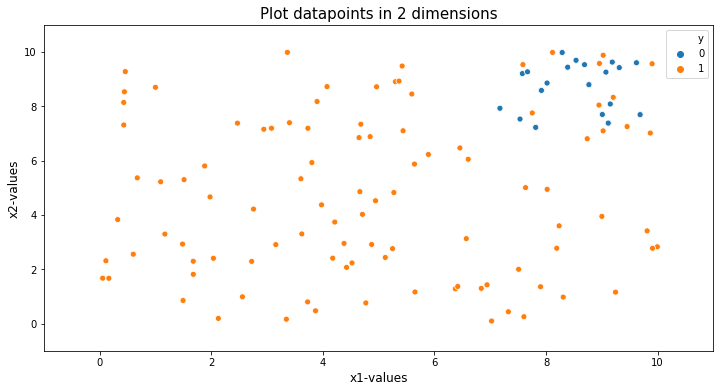

In [31]:
plot_data(ros_resample)

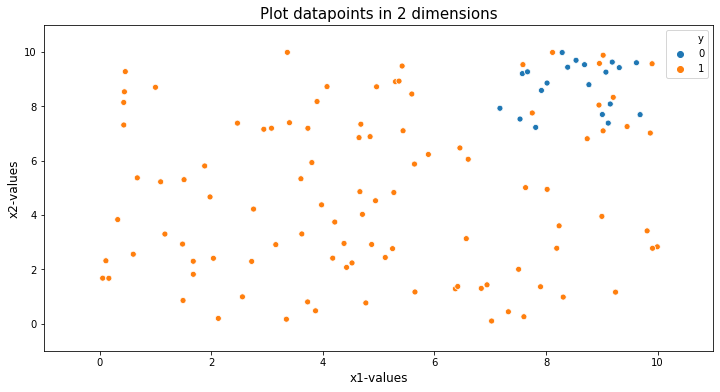

In [32]:
plot_data(df)

It looks like there is no difference betweent our two DataFrames. The reason is that RandomOverSampling copies the original data points and therefore we do not see any new data points in visual inspection.

## SMOTE - Synthetic Minority Oversampling Technique

What it basically does, it creates datapoints that lie between two (or more) original datapoints from the minority class.

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(sampling_strategy={0: 50})
X_resampled, y_resampled = smote.fit_resample(X, y)

In [35]:
smote = create_resampled_dataset(X_resampled, y_resampled)

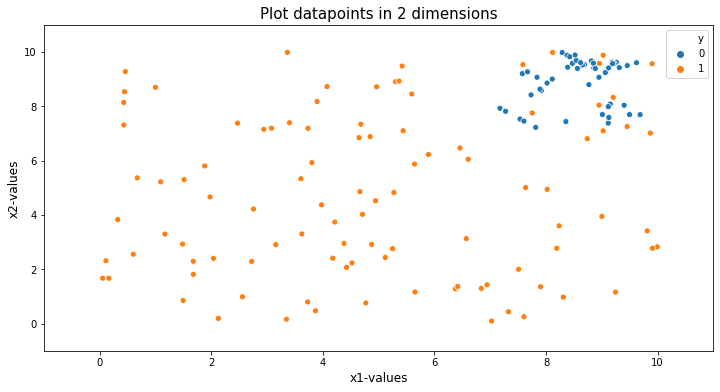

In [36]:
plot_data(smote)

## Random Undersampling

In [37]:
from imblearn.under_sampling import RandomUnderSampler

In [38]:
rus = RandomUnderSampler(sampling_strategy={1: 50})
X_resample, y_resample = rus.fit_resample(X, y)

In [39]:
rus_df = create_resampled_dataset(X_resample, y_resample)

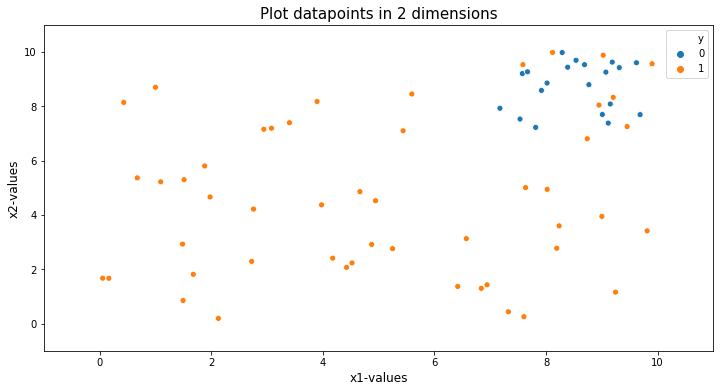

In [40]:
plot_data(rus_df)

## Near Miss

In [41]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss(sampling_strategy={1: 50})
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)
nm_df = create_resampled_dataset(X_resampled_nm, y_resampled_nm)
plot_data(nm_df)